# Linear Regression-Beginner Basic
___
## Content
**So the basic step of linear regeression is:**
1. import packages
2. import dataset
3. prepare dataset
    * check for null or outlier data ( if doeas, clean the data)
    * splitting the data for tarining and testing
    
    3.5. EDA() Exploratory Data Analysis )- optional

4. build model
5. do prediction
6. Evaluate trained data


---

In [2]:
#step 1- import Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [3]:
# Styling:

cust_palt = [
    '#111d5e', '#c70039', '#f37121', '#ffbd69', '#ffc93c'
]

plt.style.use('ggplot')

In [4]:
#step2 - import datset
dataset = pd.read_csv('dataset/heart.csv')

In [5]:
# view some of our data
dataset.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
print(
    f'Train data has {dataset.shape[1]} features, {dataset.shape[0]} observations.\nTrain features are:\n{dataset.columns.tolist()}\n'
)

Train data has 14 features, 303 observations.
Train features are:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']



In [8]:
# step3 - prepare dataset
# checking for null value
dataset.isnull().sum().sum()

0

In [9]:
# renaming columns label to understand better
dataset.columns = [
    'umur', 'jantina', 'jenis_sakit_dada', 'tekanan_darah_rehat', 'kolestrol', 'gula_dalam_darah_puasa',
    'ecg_rehat', 'kadar_degupan_jantung_capaian_max','angina_disebakan_senaman', 'st_depression', 'slope',
    'bilangan_salur_utama', 'ujian_stress_Thallium', 'kondisi']

In [10]:
dataset.nunique()

umur                                  41
jantina                                2
jenis_sakit_dada                       4
tekanan_darah_rehat                   49
kolestrol                            152
gula_dalam_darah_puasa                 2
ecg_rehat                              3
kadar_degupan_jantung_capaian_max     91
angina_disebakan_senaman               2
st_depression                         40
slope                                  3
bilangan_salur_utama                   5
ujian_stress_Thallium                  4
kondisi                                2
dtype: int64

### Step 3.5 - EDA
first, renaming the categotical data for easier EDA interpretation

In [11]:
dataset['jantina'] = dataset['jantina'].map({0:'female',1:'male'})

dataset['jenis_sakit_dada']= dataset['jenis_sakit_dada'].map({3:'asymptomatic', 1:'atypical_angina', 2:'non_anginal_pain', 0:'typical_angina'})

dataset['gula_dalam_darah_puasa'] = dataset['gula_dalam_darah_puasa'].map({0:'less_than_120mg/ml',1:'greater_than_120mg/ml'})

dataset['ecg_rehat'] = dataset['ecg_rehat'].map({0:'normal',1:'ST-T_wave_abnormality',2:'left_ventricular_hypertrophy'})

dataset['angina_disebakan_senaman'] = dataset['angina_disebakan_senaman'].map({0:'no',1:'yes'})

dataset['slope'] = dataset['slope'].map({0:'upsloping',1:'flat',2:'downsloping'})

dataset['ujian_stress_Thallium'] = dataset['ujian_stress_Thallium'].map({1:'fixed_defect',0:'normal',2:'reversable_defect'})

dataset['kondisi'] = dataset['kondisi'].map({0:'no_disease', 1:'has_disease'})

In [12]:
# Masks for easier selection in future:
categorical = [i for i in dataset.loc[:,dataset.nunique()<=10]]
continuous = [i for i in dataset.loc[:,dataset.nunique()>=10]]

In [13]:
def ctg_dist(df, cols, hue=None,rows=3, columns=3):
    
    '''A function for displaying cateorical distribution'''
    
    fig, axes = plt.subplots(rows, columns, figsize=(16, 12))
    axes = axes.flatten()

    for i, j in zip(df[cols].columns, axes):
        sns.countplot(x=i,
                    data=df,
                    palette=cust_palt,
                    hue=hue,
                    ax=j,
                    order=df[i].value_counts().index)
        j.tick_params(labelrotation=10)
        
        total = float(len(df[i]))
        
        j.set_title(f'Distribution of {str(i).capitalize()} ')
           
        for p in j.patches:
            height = p.get_height()
            j.text(p.get_x() + p.get_width() / 2., height + 2,'{:1.2f}%'.format((height / total) * 100), ha='center')
        
        plt.tight_layout()

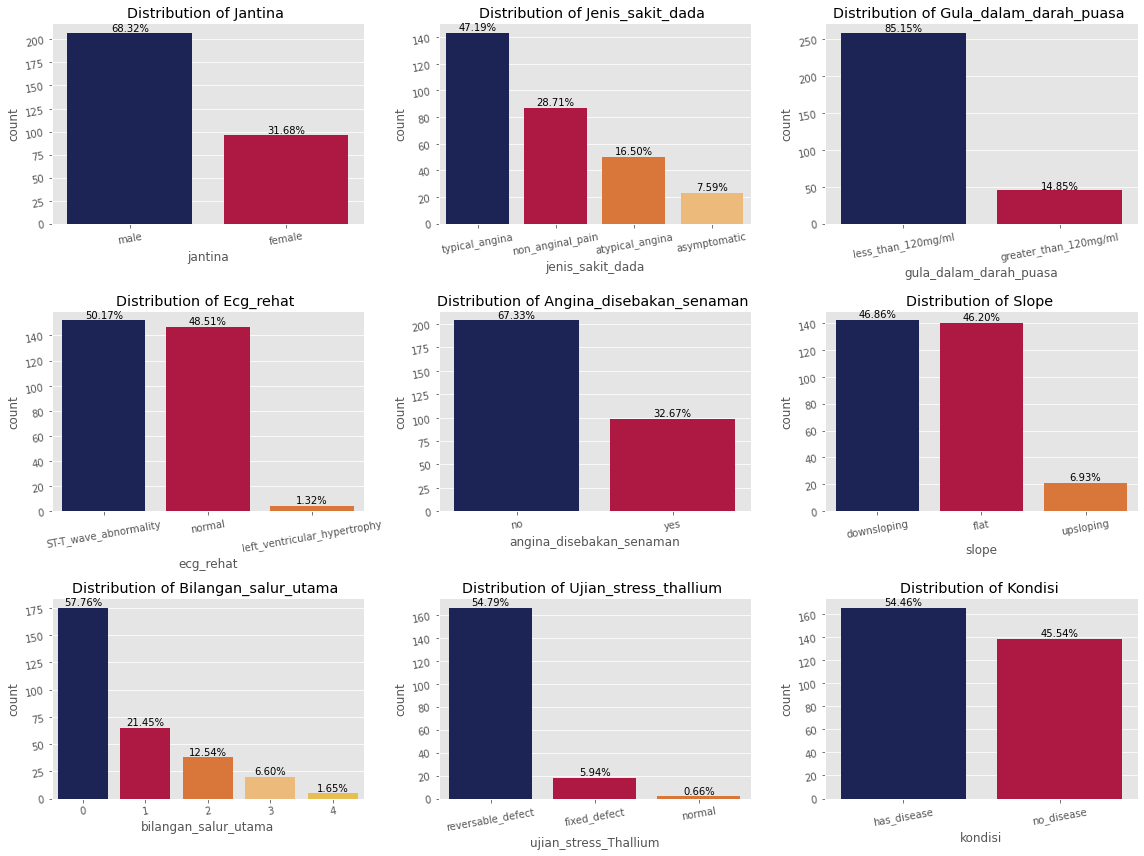

In [14]:
ctg_dist(dataset, categorical)

### Univariate Analysis
>Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn't deal with causes or relationships (unlike regression) and it's major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

C:\Users\MUSTAKIM\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MUSTAKIM\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\MUSTAKIM\AppData\Roaming\Python\Python38\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\MUSTAKIM\AppData\Roaming\Python\Python38\site-packages\se

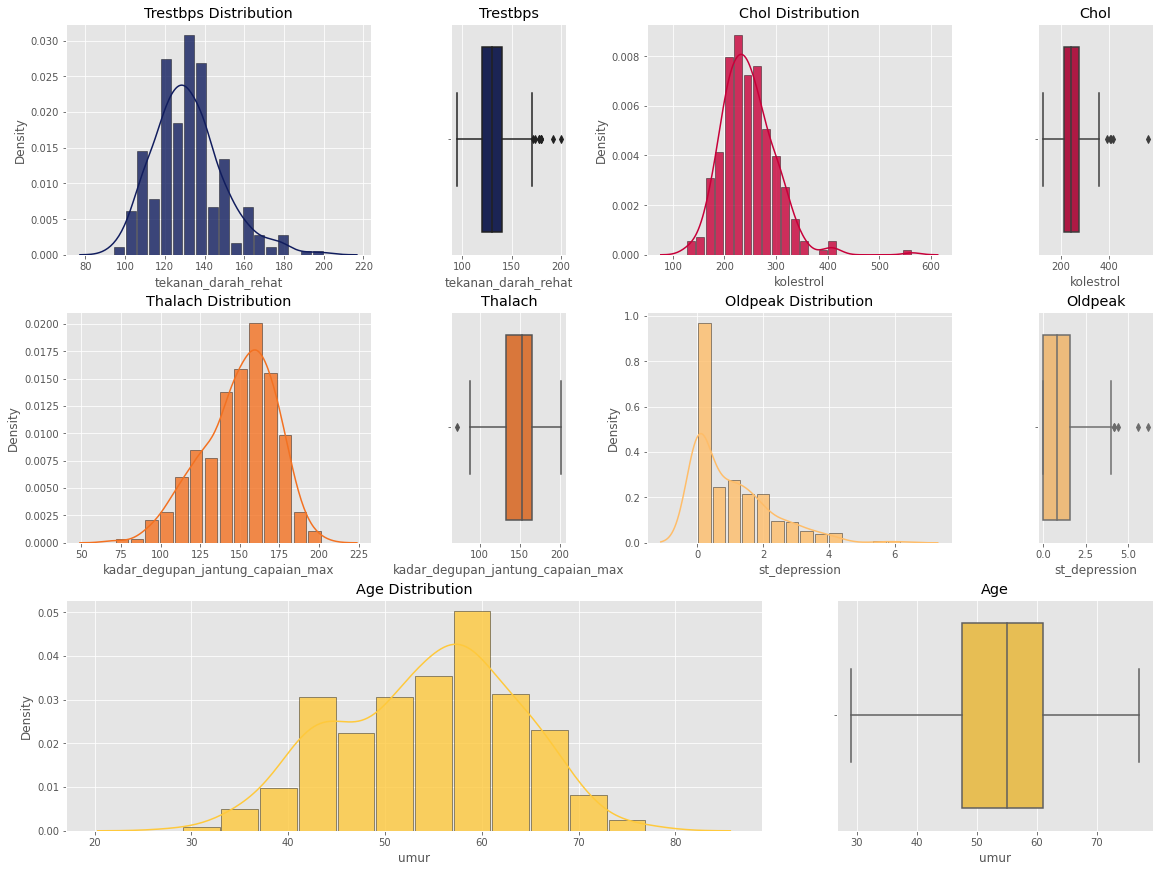

In [15]:
# Displaying numeric distribution:

fig = plt.figure(constrained_layout=True, figsize=(16, 12))
grid = gridspec.GridSpec(ncols=6, nrows=3, figure=fig)
ax1 = fig.add_subplot(grid[0, :2])
ax1.set_title('Trestbps Distribution')

sns.distplot(dataset[continuous[1]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[0])

ax15 = fig.add_subplot(grid[0, 2:3])
ax15.set_title('Trestbps')

sns.boxplot(dataset[continuous[1]], orient='v', color=cust_palt[0])

ax2 = fig.add_subplot(grid[0, 3:5])
ax2.set_title('Chol Distribution')

sns.distplot(dataset[continuous[2]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[1])

ax25 = fig.add_subplot(grid[0, 5:])
ax25.set_title('Chol')

sns.boxplot(dataset[continuous[2]], orient='v', color=cust_palt[1])

ax3 = fig.add_subplot(grid[1, :2])
ax3.set_title('Thalach Distribution')

sns.distplot(dataset[continuous[3]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[2])

ax35 = fig.add_subplot(grid[1, 2:3])
ax35.set_title('Thalach')

sns.boxplot(dataset[continuous[3]], orient='v', color=cust_palt[2])

ax4 = fig.add_subplot(grid[1, 3:5])
ax4.set_title('Oldpeak Distribution')

sns.distplot(dataset[continuous[4]],
                 hist_kws={
                 'rwidth': 0.85,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[3])

ax45 = fig.add_subplot(grid[1, 5:])
ax45.set_title('Oldpeak')

sns.boxplot(dataset[continuous[4]], orient='v', color=cust_palt[3])

ax5 = fig.add_subplot(grid[2, :4])
ax5.set_title('Age Distribution')

sns.distplot(dataset[continuous[0]],
                 hist_kws={
                 'rwidth': 0.95,
                 'edgecolor': 'black',
                 'alpha': 0.8},
                 color=cust_palt[4])

ax55 = fig.add_subplot(grid[2, 4:])
ax55.set_title('Age')

sns.boxplot(dataset[continuous[0]], orient='h', color=cust_palt[4])

plt.show()

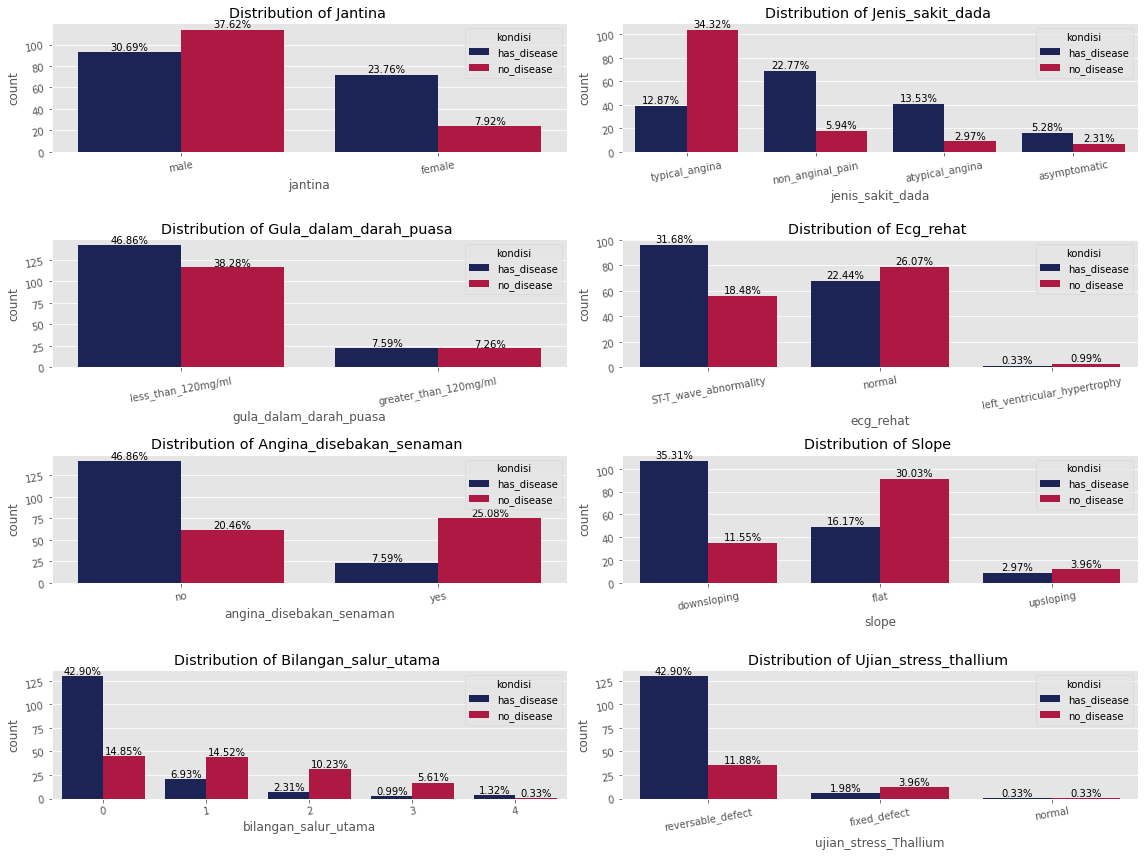

In [16]:
# Categorical data vs condition:

ctg_dist(dataset, categorical[:-1], 'kondisi', 4, 2)

In [17]:
# 3D scatterplot of numeric data:

fig = px.scatter_3d(dataset, x='kolestrol', y='kadar_degupan_jantung_capaian_max', z='umur', size='st_depression',
              color='kondisi', opacity=0.8)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

So,the dataset look promising ( no missing value and etc). lets continue with splititng for training and testing

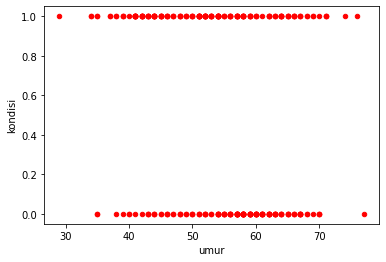

In [ ]:
#lets view our data scatter before splitting
dataset.plot(kind='scatter', x ='umur', y='kondisi', color='red')
plt.show()

In [ ]:
#spliting data
features = dataset.iloc[:, :-2]
target = dataset.iloc[:, -1]
x_train, x_test, y_train,y_test = train_test_split(features, target, test_size=0.3, random_state=48)

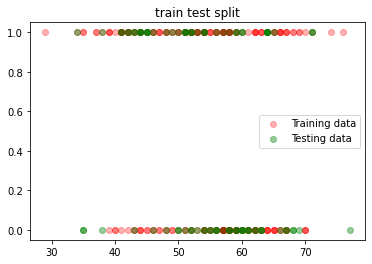

In [ ]:
plt.scatter(x_train['umur'], y_train, label='Training data', color='red', alpha=0.3)
plt.scatter(x_test['umur'], y_test, label='Testing data', color='green', alpha=0.4)
plt.legend()
plt.title('train test split')
plt.show()

In [ ]:
#step4 -build model and train
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#step 5- do prediction
y_pred = model.predict(x_test)
target_pred =[]       
for r in y_pred:
    if r > 0.5:
        r = 1
        target_pred.append(r)
    else:
        r=0
        target_pred.append(r)


In [ ]:
#step 6- evaluate model/ prediction

print(
    f'The accuracy of the model prediction is: {accuracy_score(y_test, target_pred)}'
)

The accuracy of the model prediction is: 0.8351648351648352
